<a href="https://colab.research.google.com/github/Vishal1092003/CatBoostRegressor/blob/main/Catboostclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries and model


In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,classification_report





#data preprocessing


data read

In [7]:
data=pd.read_csv('/content/train.csv')
print(data)

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

dropping the unnecessary columns


In [8]:
data=data.drop(['Name','SibSp','Pclass','Ticket','Cabin','Embarked','Parch'],axis=1)
print(data)

     PassengerId  Survived     Sex   Age     Fare
0              1         0    male  22.0   7.2500
1              2         1  female  38.0  71.2833
2              3         1  female  26.0   7.9250
3              4         1  female  35.0  53.1000
4              5         0    male  35.0   8.0500
..           ...       ...     ...   ...      ...
886          887         0    male  27.0  13.0000
887          888         1  female  19.0  30.0000
888          889         0  female   NaN  23.4500
889          890         1    male  26.0  30.0000
890          891         0    male  32.0   7.7500

[891 rows x 5 columns]


In [9]:
data.head()

,PassengerId,Survived,Sex,Age,Fare
0,1,0,male,22.0,7.2500
1,2,1,female,38.0,71.2833
2,3,1,female,26.0,7.9250
3,4,1,female,35.0,53.1000
4,5,0,male,35.0,8.0500


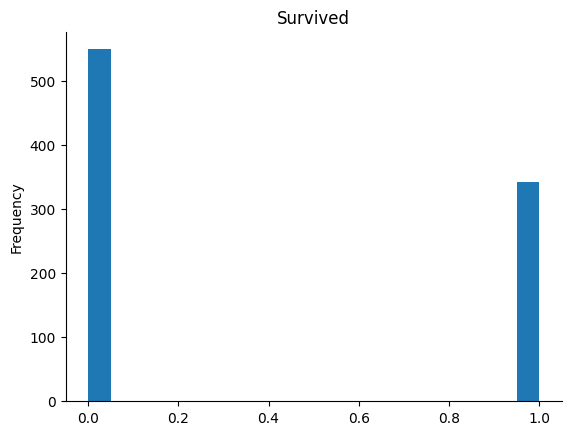

In [10]:
# @title Survived

from matplotlib import pyplot as plt
data['Survived'].plot(kind='hist', bins=20, title='Survived')
plt.gca().spines[['top', 'right',]].set_visible(False)

see the uppper survived graph then see it 342 peoples are survived


In [11]:
data['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [12]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Sex,0
Age,177
Fare,0


Handling the missing data =>filling


In [13]:
data['Age']=data['Age'].fillna(data['Age'].mean())
print(data)

     PassengerId  Survived     Sex        Age     Fare
0              1         0    male  22.000000   7.2500
1              2         1  female  38.000000  71.2833
2              3         1  female  26.000000   7.9250
3              4         1  female  35.000000  53.1000
4              5         0    male  35.000000   8.0500
..           ...       ...     ...        ...      ...
886          887         0    male  27.000000  13.0000
887          888         1  female  19.000000  30.0000
888          889         0  female  29.699118  23.4500
889          890         1    male  26.000000  30.0000
890          891         0    male  32.000000   7.7500

[891 rows x 5 columns]


In [14]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Sex,0
Age,0
Fare,0


#Model training

In [17]:
cat_features=['Sex']
!pip install catboost
# from catboost import PooL,CatBoostClassifier


In [19]:
from catboost import Pool,CatBoostClassifier


In [25]:
#  print(data)
x = data.drop(['Survived'], axis=1)
y = data['Survived']
x.head()

,PassengerId,Sex,Age,Fare
0,1,male,22.0,7.2500
1,2,female,38.0,71.2833
2,3,female,26.0,7.9250
3,4,female,35.0,53.1000
4,5,male,35.0,8.0500


In [28]:
y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [29]:
train_pool=Pool(x,y,cat_features=cat_features)
print(train_pool)

#use of catboostclassifier


In [30]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=100,depth=0,learning_rate=0.1,loss_function='Logloss')

model.fit(train_pool)



0:	learn: 0.6880654	total: 46.6ms	remaining: 4.61s
1:	learn: 0.6839369	total: 47.5ms	remaining: 2.33s
2:	learn: 0.6805702	total: 47.9ms	remaining: 1.55s
3:	learn: 0.6778271	total: 48.6ms	remaining: 1.17s
4:	learn: 0.6755988	total: 49.1ms	remaining: 934ms
5:	learn: 0.6737814	total: 49.5ms	remaining: 776ms
6:	learn: 0.6723023	total: 49.9ms	remaining: 663ms
7:	learn: 0.6711033	total: 50.3ms	remaining: 578ms
8:	learn: 0.6701223	total: 50.7ms	remaining: 512ms
9:	learn: 0.6693211	total: 51ms	remaining: 459ms
10:	learn: 0.6686747	total: 51.4ms	remaining: 416ms
11:	learn: 0.6681466	total: 51.8ms	remaining: 380ms
12:	learn: 0.6677175	total: 52.1ms	remaining: 349ms
13:	learn: 0.6673717	total: 52.5ms	remaining: 322ms
14:	learn: 0.6670912	total: 52.8ms	remaining: 299ms
15:	learn: 0.6668562	total: 53.2ms	remaining: 279ms
16:	learn: 0.6666728	total: 53.7ms	remaining: 262ms
17:	learn: 0.6665244	total: 54.1ms	remaining: 246ms
18:	learn: 0.6664002	total: 54.5ms	remaining: 232ms
19:	learn: 0.6663010	tot

In [34]:
y_predict=model.predict(train_pool)
print(y_predict)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [36]:
accuracy=accuracy_score(y,y_predict)
print(accuracy)

0.6161616161616161


In [39]:
classification=classification_report(y,y_predict)
print(classification)

              precision    recall  f1-score   support

           0       0.62      1.00      0.76       549
           1       0.00      0.00      0.00       342

    accuracy                           0.62       891
   macro avg       0.31      0.50      0.38       891
weighted avg       0.38      0.62      0.47       891



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
feature_importance=model.get_feature_importance(prettified=True)
print(feature_importance)

    Feature Id  Importances
0  PassengerId          0.0
1          Sex          0.0
2          Age          0.0
3         Fare          0.0


#testing on a new dataframe

In [44]:
new_passenger=pd.DataFrame({
    'PassengerId':[100000],
    'Sex':['male'],
    'Age':[25],
    'Fare':[10]
})

In [41]:
print(x.head())

   PassengerId     Sex   Age     Fare
0            1    male  22.0   7.2500
1            2  female  38.0  71.2833
2            3  female  26.0   7.9250
3            4  female  35.0  53.1000
4            5    male  35.0   8.0500


In [48]:
new_passenger_pool=Pool(new_passenger,cat_features=cat_features)
predict_new=model.predict(new_passenger_pool)
print(predict_new)
if predict_new[0]==0:
  print('not survived')
else:
  print('survived')



[0]
not survived


#YOU CAN CHECK THE SAME MODEL BY TAKING MOVIES DATASET OR DIABETIES DATASET

In [ ]:
#Thank